In [1]:
#carefull for PyCaret need to use an older version of python --> Created another environment with Python 3.8.13
from platform import python_version
print(python_version())

3.8.13


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from pycaret.classification import *
from xgboost import *

In [8]:
TrainDS = pd.read_csv('C:/Users/ljacquesdedixmude/streamlit_SP/Data/training-stroke.csv')
TrainDS.drop('id', axis=1, inplace=True)
TestDS = pd.read_csv('C:/Users/ljacquesdedixmude/streamlit_SP/Data/testing-stroke.csv')


In [9]:
TrainDS.describe()

,Age,BodyMassIndex,Hypertension,Had_Heart_Disease,Mean_Glucose_Level,Stroke
count,4088.000000,3928.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.382642,28.896207,0.096624,0.054550,106.016849,0.048679
std,22.505514,7.826705,0.295482,0.227127,44.771715,0.215223
min,0.080000,10.300000,0.000000,0.000000,55.220000,0.000000
25%,25.000000,23.500000,0.000000,0.000000,77.520000,0.000000
50%,45.000000,28.100000,0.000000,0.000000,92.145000,0.000000
75%,61.000000,33.100000,0.000000,0.000000,114.012500,0.000000
max,82.000000,97.600000,1.000000,1.000000,271.740000,1.000000


In [10]:
s = setup(TrainDS, target = 'Stroke')

,Description,Value
0,session_id,6027
1,Target,Stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4088, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9490,0.8498,0.0352,0.3000,0.0625,0.0562,0.0917,0.0740
lr,Logistic Regression,0.9493,0.8455,0.0071,0.1000,0.0133,0.0121,0.0248,0.6650
lda,Linear Discriminant Analysis,0.9465,0.8415,0.0286,0.1667,0.0485,0.0394,0.0555,0.0060
catboost,CatBoost Classifier,0.9458,0.8307,0.0205,0.1583,0.0348,0.0256,0.0408,1.1580
lightgbm,Light Gradient Boosting Machine,0.9402,0.8191,0.0338,0.1283,0.0519,0.0334,0.0414,0.0300
ada,Ada Boost Classifier,0.9448,0.8124,0.0138,0.1500,0.0250,0.0150,0.0305,0.0400
xgboost,Extreme Gradient Boosting,0.9367,0.8086,0.0343,0.1292,0.0531,0.0302,0.0392,0.0990
rf,Random Forest Classifier,0.9472,0.8006,0.0071,0.0250,0.0111,0.0065,0.0056,0.0850
nb,Naive Bayes,0.3796,0.7926,0.9933,0.0752,0.1397,0.0502,0.1586,0.0040
et,Extra Trees Classifier,0.9413,0.7597,0.0205,0.1533,0.0341,0.0180,0.0316,0.0750


# Logistic Regression has the best ROC AUC

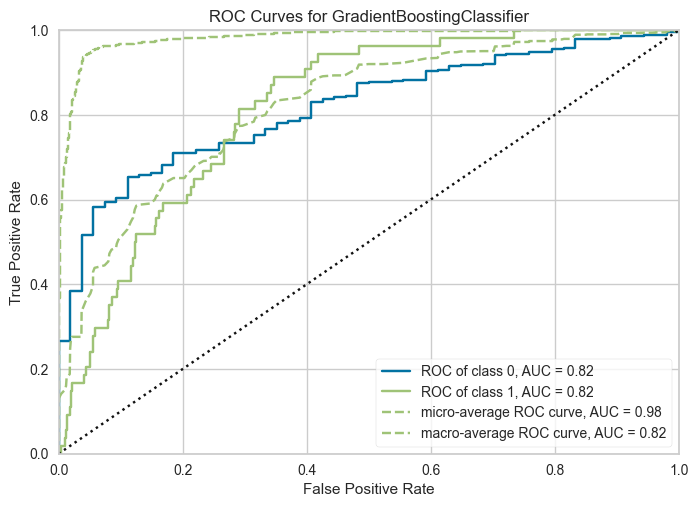

In [12]:
plot_model(best, plot = 'auc')

In [13]:
lr = create_model('lr')
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8424,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9545,0.8406,0.0714,1.0000,0.1333,0.1276,0.2611
2,0.9510,0.8921,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.8461,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9476,0.8183,0.0000,0.0000,0.0000,-0.0066,-0.0134
5,0.9510,0.9013,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9476,0.8583,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9476,0.8084,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9476,0.8293,0.0000,0.0000,0.0000,0.0000,0.0000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6027, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [14]:
tuned_lr = tune_model(lr, n_iter=20, optimize='AUC', choose_better=True)
print(tuned_lr)
# C value changed other parameters are the same

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8419,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9545,0.8438,0.0714,1.0000,0.1333,0.1276,0.2611
2,0.9510,0.8931,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.8493,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9476,0.8191,0.0000,0.0000,0.0000,-0.0066,-0.0134
5,0.9510,0.9007,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9476,0.8613,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9476,0.8081,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9476,0.8285,0.0000,0.0000,0.0000,0.0000,0.0000


LogisticRegression(C=0.287, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6027, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [15]:
lr = create_model('lr')
tuned_lr = tune_model(lr, n_iter=50, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_lr, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
# predictions[['id','Stroke']].to_csv('lr.csv', index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8419,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9545,0.8438,0.0714,1.0000,0.1333,0.1276,0.2611
2,0.9510,0.8931,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.8493,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9476,0.8191,0.0000,0.0000,0.0000,-0.0066,-0.0134
5,0.9510,0.9007,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9476,0.8613,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9476,0.8081,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9476,0.8285,0.0000,0.0000,0.0000,0.0000,0.0000


## Let's try using the xgboost (extreme gradient boosting) model

In [16]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9233,0.7674,0.0000,0.0000,0.0000,-0.0344,-0.0371
1,0.9301,0.8564,0.0000,0.0000,0.0000,-0.0303,-0.0332
2,0.9406,0.8395,0.0000,0.0000,0.0000,-0.0176,-0.0234
3,0.9406,0.8480,0.0000,0.0000,0.0000,-0.0176,-0.0234
4,0.9476,0.7978,0.0000,0.0000,0.0000,-0.0066,-0.0134
5,0.9510,0.8248,0.1429,0.5000,0.2222,0.2049,0.2490
6,0.9510,0.8039,0.1333,0.6667,0.2222,0.2084,0.2837
7,0.9231,0.7279,0.0000,0.0000,0.0000,-0.0345,-0.0373
8,0.9266,0.7862,0.0667,0.1250,0.0870,0.0524,0.0552


In [17]:
tuned_xgb = tune_model(xgb, n_iter=20, optimize='AUC', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8328,0.8225,0.6000,0.1765,0.2727,0.2088,0.2594
1,0.7832,0.8587,0.7857,0.1571,0.2619,0.1963,0.2855
2,0.8357,0.8482,0.7143,0.1887,0.2985,0.2396,0.3089
3,0.7867,0.8514,0.7857,0.1594,0.2651,0.1999,0.2887
4,0.8042,0.8409,0.7857,0.1719,0.2821,0.2193,0.3059
5,0.8112,0.8900,0.7143,0.1667,0.2703,0.2073,0.2811
6,0.8531,0.8600,0.8000,0.2353,0.3636,0.3075,0.3821
7,0.7972,0.8096,0.4667,0.1228,0.1944,0.1215,0.1575
8,0.8147,0.8042,0.8000,0.1935,0.3117,0.2482,0.3330


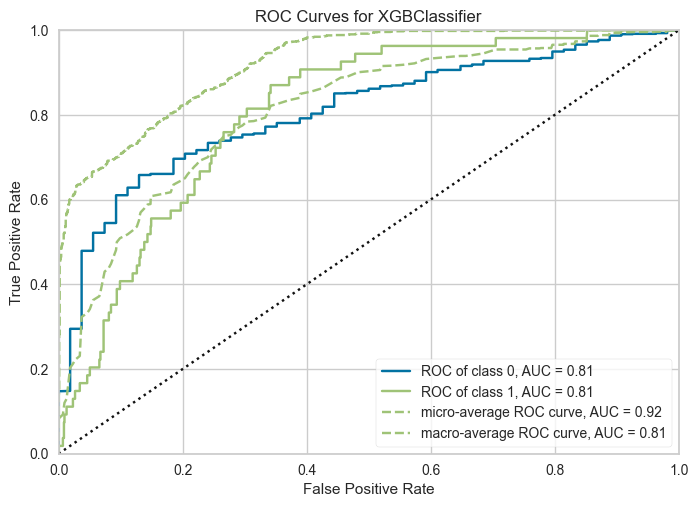

In [18]:
plot_model(tuned_xgb)

In [25]:
dashboard(tuned_xgb)
# Possibility to use pycaret tu have a dashboard window


Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...
Calculating predicti

 * Running on all addresses.
 * Running on http://192.168.1.39:8050/ (Press CTRL+C to quit)
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET / HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /assets/bootstrap.min.css?m=1663937319.5170038 HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_1m1663937303.12.1.min.js HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /_dash-component-suites/dash/deps/react@16.v2_6_1m1663937303.14.0.min.js HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_6_1m1663937303.14.0.min.js HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_6_1m1663937303.8.1.min.js HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:18] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_6_1m1663937302.js HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:48:19] "GET /_d


                so no dtreeviz visualisation of decision trees will be shown on the shadow trees tab.

                See https://github.com/parrt/dtreeviz for info on how to properly install graphviz 
                for dtreeviz. 
                
No graphviz 'dot' executable available!


192.168.1.39 - - [17/Oct/2022 17:50:47] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.39 - - [17/Oct/2022 17:50:51] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:50:52] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.39 - - [17/Oct/2022 17:51:09] "POST /_dash-u

In [20]:
print(tuned_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=190,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6027, reg_alpha=5, ...)


In [21]:
import pickle
pickle_out = open("tuned_xgb.pkl", "wb")
pickle.dump(tuned_xgb, pickle_out)
pickle_out.close()

In [22]:
TestDS.head(5)

,id,Age,Gender,Married,Employment_Type,Urban_Rural,Smoker,BodyMassIndex,Hypertension,Had_Heart_Disease,Mean_Glucose_Level
0,07d9152e686ddb50c5330f7f9c1c58bc,79.0,Male,Yes,Private,Rural,never smoked,NaN,1,0,75.02
1,2f0bf07b716733d56ffa0b68cfe3823f,64.0,Female,Yes,Self-employed,Rural,smokes,31.6,0,0,114.47
2,d63fbf8c3173730f82b150c5ef38b8ff,61.0,Female,Yes,Private,Rural,smokes,26.1,0,0,99.35
3,d96988b88c76419fad9677dcd6adb947,3.0,Female,No,children,Rural,Unknown,22.2,0,0,97.31
4,142536b9b535b78e681c11b0195d962f,4.0,Male,No,children,Rural,Unknown,15.2,0,0,99.96


In [23]:
print(TestDS.dtypes)

id                     object
Age                   float64
Gender                 object
Married                object
Employment_Type        object
Urban_Rural            object
Smoker                 object
BodyMassIndex         float64
Hypertension            int64
Had_Heart_Disease       int64
Mean_Glucose_Level    float64
dtype: object


In [62]:
predictions = predict_model(tuned_xgb, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
# predictions[['id','Stroke']].to_csv('xgboost.csv', index=False)

## The LDA model (Linear Discriminant Analysis) 

In [60]:
# Thanks to PyCaret, we are able to train, tune, and export predictions to a csv file (very) easily
lda = create_model('lda')
tuned_lda = tune_model(lda, n_iter=50, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_lda, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
# predictions[['id','Stroke']].to_csv('lda.csv', index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.8642,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9510,0.7606,0.0667,1.0000,0.1250,0.1192,0.2518
2,0.9510,0.7855,0.0667,1.0000,0.1250,0.1192,0.2518
3,0.9441,0.8218,0.0625,0.5000,0.1111,0.0999,0.1622
4,0.9441,0.8322,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9406,0.8618,0.0000,0.0000,0.0000,-0.0066,-0.0144
6,0.9441,0.8796,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9441,0.8940,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9441,0.7986,0.0000,0.0000,0.0000,0.0000,0.0000


## GBC 

In [68]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_gbc, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
predictions[['id','Stroke']].to_csv('gbc2.csv', index=False)
print(predictions)
#score of 0.5 - useless / Predictions of Stroke 0.0552 for every individual

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.8864,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9476,0.7536,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9476,0.7574,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9441,0.8251,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9441,0.8416,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9441,0.8655,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9441,0.8734,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9441,0.8803,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9441,0.7604,0.0000,0.0000,0.0000,0.0000,0.0000


                                    id   Age  Gender Married Employment_Type  \
0     07d9152e686ddb50c5330f7f9c1c58bc  79.0    Male     Yes         Private   
1     2f0bf07b716733d56ffa0b68cfe3823f  64.0  Female     Yes   Self-employed   
2     d63fbf8c3173730f82b150c5ef38b8ff  61.0  Female     Yes         Private   
3     d96988b88c76419fad9677dcd6adb947   3.0  Female      No        children   
4     142536b9b535b78e681c11b0195d962f   4.0    Male      No        children   
...                                ...   ...     ...     ...             ...   
1017  da6ea77475918a3d83c7e49223d453cc  28.0  Female      No         Private   
1018  8686fa633cfb5f49a0609122b9e4140b  46.0  Female     Yes         Private   
1019  b294fccdfe95bc7f7dd813216a821a76  32.0  Female     Yes         Private   
1020  4cabd4062d563c8027e488a337c34d28   5.0  Female      No        children   
1021  6917e6014aa45687457b8e6cf3713515  17.0  Female      No         Private   

     Urban_Rural        Smoker  BodyMas